In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
filepath='loan.csv'
data = pd.read_csv(filepath_or_buffer=filepath,sep=',',parse_dates=True,header=0)

In [4]:
data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,20,571203,18000,18000,60 months,10.16%,383.87,10+ years,MORTGAGE,72804.0,...,0.0,1995-12-27 02:06,NaN,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,40,641849,13200,13200,36 months,18.49%,480.47,2 years,RENT,110000.0,...,0.0,2000-12-11 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,60,694891,15675,15675,36 months,8.90%,497.74,10+ years,MORTGAGE,100000.0,...,0.0,1994-04-07 12:00,NaN,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
3,80,734736,21600,21600,36 months,7.90%,675.87,10+ years,MORTGAGE,95000.0,...,0.0,1999-05-05 10:59,NaN,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
4,100,784712,16500,16500,60 months,7.90%,333.78,2 years,MORTGAGE,42000.0,...,0.0,1993-07-16 08:41,NaN,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49


In [5]:
#drop the first column of the data (has no real meaning)
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#drop the record with two many NaNs.
data = data.dropna(thresh= 5)

In [7]:
data.columns=[column.title() for column in data.columns]

In [8]:
#set the 'Id' column to be the index of the data.
data.set_index('Id',inplace=True,verify_integrity=True)

In [9]:
#drop the record with NaN in 'Emp_Length' column.
data.dropna(subset=['Emp_Length'],inplace=True)

In [10]:
data=data.groupby('Delinq_2Yrs').apply(lambda g:g.fillna(np.round(g.mean(),2)))

In [11]:
data.reset_index(level=0,drop=True,inplace=True)

In [12]:
data.head()

,Loan_Amnt,Funded_Amnt,Term,Int_Rate,Installment,Emp_Length,Home_Ownership,Annual_Inc,Loan_Status,Purpose,...,Delinq_2Yrs,Earliest_Cr_Line,Mths_Since_Last_Delinq,Open_Acc,Revol_Bal,Total_Acc,Out_Prncp,Total_Pymnt,Total_Rec_Prncp,Total_Rec_Int
Id,,,,,,,,,,,,,,,,,,,,,
571203,18000,18000,60 months,10.16%,383.87,10+ years,MORTGAGE,72804.0,Current,credit_card,...,0.0,1995-12-27 02:06,47.61,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
641849,13200,13200,36 months,18.49%,480.47,2 years,RENT,110000.0,Current,debt_consolidation,...,0.0,2000-12-11 11:15,29.00,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
694891,15675,15675,36 months,8.90%,497.74,10+ years,MORTGAGE,100000.0,Current,small_business,...,0.0,1994-04-07 12:00,47.61,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
734736,21600,21600,36 months,7.90%,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,house,...,0.0,1999-05-05 10:59,47.61,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
784712,16500,16500,60 months,7.90%,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),small_business,...,0.0,1993-07-16 08:41,47.61,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49


In [13]:
def interest(x):
    x=float(x.strip('%'))
    return x

In [14]:
data[['Int_Rate']]=data[['Int_Rate']].applymap(interest)

In [15]:
def credit_line_year(x):
    x=int(x.split('-')[0])
    return x

In [16]:
data[['Earliest_Cr_Line']]=data[['Earliest_Cr_Line']].applymap(credit_line_year)

In [17]:
data['Earliest_Cr_Line']=2018-data['Earliest_Cr_Line']

In [18]:
def employment(x):
    x=x.split(' ')[0]
    if x=='10+':
        x=10
    elif x=='<':
        x=0
    else:
        x=int(x)
    return x

In [19]:
data[['Emp_Length']]=data[['Emp_Length']].applymap(employment)

In [20]:
data.Loan_Status.value_counts()

Current               7769
Fully Paid             921
Charged Off            209
Late (31-120 days)     140
In Grace Period         46
Late (16-30 days)       19
Default                 15
Name: Loan_Status, dtype: int64

In [21]:
#data=data[data['Loan_Status'].isin(['Charged Off','Fully Paid','Default','Late (31-120 days)','Late (16-30 days)'])]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9119 entries, 571203 to 9664845
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_Amnt               9119 non-null   int64  
 1   Funded_Amnt             9119 non-null   int64  
 2   Term                    9119 non-null   object 
 3   Int_Rate                9119 non-null   float64
 4   Installment             9119 non-null   float64
 5   Emp_Length              9119 non-null   int64  
 6   Home_Ownership          9119 non-null   object 
 7   Annual_Inc              9119 non-null   float64
 8   Loan_Status             9119 non-null   object 
 9   Purpose                 9119 non-null   object 
 10  Addr_State              9119 non-null   object 
 11  Dti                     9119 non-null   float64
 12  Delinq_2Yrs             9119 non-null   float64
 13  Earliest_Cr_Line        9119 non-null   int64  
 14  Mths_Since_Last_Delinq  9119 non

In [23]:
def status(x):
    if x=='Fully Paid':
        x=1
    elif x=='Current':
        x=1
    else:
        x=0 
    return x

In [24]:
data[['Loan_Status']]=data[['Loan_Status']].applymap(status)

In [25]:
data.Loan_Status.value_counts()

1    8690
0     429
Name: Loan_Status, dtype: int64

In [26]:
#drop the columns with little association with the Loan_Status.
#'Out_Prncp','Total_Pymnt','Total_Rec_Prncp','Total_Rec_Int'
data.drop(['Loan_Amnt'],axis=1,inplace=True)

In [27]:
data.columns=['Loan_Amount','Term','Interest_Rate','Installment','Employment_Length','Home_Ownership','Annual_Income','Loan_Status',
             'Purpose','State','DTI','Deliquency_in_2years','Credit_Line_Year','Months_since_Last_Deliquency','Open_Account','Revolving_Balance','Total_Account',
             'Out_Principal','Total_Payment','Total_Paid_Principal','Total_Paid_Interest']

In [28]:
data[['Deliquency_in_2years','Open_Account','Total_Account']]=data[['Deliquency_in_2years','Open_Account','Total_Account']].astype(np.int64)

In [29]:
data

,Loan_Amount,Term,Interest_Rate,Installment,Employment_Length,Home_Ownership,Annual_Income,Loan_Status,Purpose,State,...,Deliquency_in_2years,Credit_Line_Year,Months_since_Last_Deliquency,Open_Account,Revolving_Balance,Total_Account,Out_Principal,Total_Payment,Total_Paid_Principal,Total_Paid_Interest
Id,,,,,,,,,,,,,,,,,,,,,
571203,18000,60 months,10.16,383.87,10,MORTGAGE,72804.0,1,credit_card,MA,...,0,23,47.61,21,8751.0,49,13263.18,7273.77,4736.82,2536.95
641849,13200,36 months,18.49,480.47,2,RENT,110000.0,1,debt_consolidation,IL,...,0,18,29.00,16,16062.0,36,10546.93,4324.23,2653.07,1671.16
694891,15675,36 months,8.90,497.74,10,MORTGAGE,100000.0,1,small_business,WA,...,0,24,47.61,16,20650.0,45,15294.25,496.78,380.75,116.03
734736,21600,36 months,7.90,675.87,10,MORTGAGE,95000.0,1,house,WI,...,0,19,47.61,9,416.0,24,0.00,23521.69,21600.00,1921.69
784712,16500,60 months,7.90,333.78,2,MORTGAGE,42000.0,0,small_business,NY,...,0,25,47.61,9,2229.0,17,12966.64,5000.85,3533.36,1467.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968302,16000,60 months,20.20,425.69,8,MORTGAGE,126000.0,1,home_improvement,WA,...,8,18,17.00,10,19487.0,31,15523.08,1276.83,476.92,799.91
2085874,4800,36 months,16.29,169.45,10,MORTGAGE,135000.0,1,home_improvement,GA,...,9,24,7.00,6,9308.0,44,3080.94,2537.25,1719.06,818.19
6296667,35000,60 months,24.50,1017.07,10,MORTGAGE,150000.0,1,credit_card,GA,...,9,29,3.00,20,32925.0,39,32752.18,7107.52,2247.82,4859.70


In [30]:
data=data[data.Term==' 36 months'].drop('Term',axis=1)

In [31]:
data

,Loan_Amount,Interest_Rate,Installment,Employment_Length,Home_Ownership,Annual_Income,Loan_Status,Purpose,State,DTI,Deliquency_in_2years,Credit_Line_Year,Months_since_Last_Deliquency,Open_Account,Revolving_Balance,Total_Account,Out_Principal,Total_Payment,Total_Paid_Principal,Total_Paid_Interest
Id,,,,,,,,,,,,,,,,,,,,
641849,13200,18.49,480.47,2,RENT,110000.0,1,debt_consolidation,IL,17.02,0,18,29.00,16,16062.0,36,10546.93,4324.230000,2653.07,1671.16
694891,15675,8.90,497.74,10,MORTGAGE,100000.0,1,small_business,WA,9.10,0,24,47.61,16,20650.0,45,15294.25,496.780000,380.75,116.03
734736,21600,7.90,675.87,10,MORTGAGE,95000.0,1,house,WI,3.42,0,19,47.61,9,416.0,24,0.00,23521.690000,21600.00,1921.69
807342,21000,6.62,644.78,10,MORTGAGE,121392.0,1,major_purchase,PA,19.53,0,23,47.61,18,40721.0,37,15018.60,7092.580000,5981.40,1111.18
843448,5500,13.67,187.10,3,RENT,55000.0,1,debt_consolidation,NJ,20.71,0,31,47.61,17,9486.0,25,0.00,5792.140000,5500.00,292.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606915,8000,18.25,290.23,9,RENT,74000.0,1,debt_consolidation,DC,24.79,7,15,14.00,10,4404.0,32,6952.10,1741.380000,1047.90,693.48
7646852,6000,11.99,199.26,10,MORTGAGE,65000.0,1,credit_card,GA,16.71,8,20,12.00,12,8332.0,35,0.00,6285.644385,6000.00,285.64
2085874,4800,16.29,169.45,10,MORTGAGE,135000.0,1,home_improvement,GA,17.34,9,24,7.00,6,9308.0,44,3080.94,2537.250000,1719.06,818.19


In [32]:
data=pd.get_dummies(data)

In [33]:
data

,Loan_Amount,Interest_Rate,Installment,Employment_Length,Annual_Income,Loan_Status,DTI,Deliquency_in_2years,Credit_Line_Year,Months_since_Last_Deliquency,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
Id,,,,,,,,,,,,,,,,,,,,,
641849,13200,18.49,480.47,2,110000.0,1,17.02,0,18,29.00,...,0,0,0,0,0,0,0,0,0,0
694891,15675,8.90,497.74,10,100000.0,1,9.10,0,24,47.61,...,0,0,0,0,0,0,1,0,0,0
734736,21600,7.90,675.87,10,95000.0,1,3.42,0,19,47.61,...,0,0,0,0,0,0,0,1,0,0
807342,21000,6.62,644.78,10,121392.0,1,19.53,0,23,47.61,...,0,0,0,0,0,0,0,0,0,0
843448,5500,13.67,187.10,3,55000.0,1,20.71,0,31,47.61,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606915,8000,18.25,290.23,9,74000.0,1,24.79,7,15,14.00,...,0,0,0,0,0,0,0,0,0,0
7646852,6000,11.99,199.26,10,65000.0,1,16.71,8,20,12.00,...,0,0,0,0,0,0,0,0,0,0
2085874,4800,16.29,169.45,10,135000.0,1,17.34,9,24,7.00,...,0,0,0,0,0,0,0,0,0,0


In [34]:
splitter=StratifiedShuffleSplit(test_size=0.5,random_state=42)
for train_index,test_index in splitter.split(data,data['Loan_Status']):
    train_set=data.iloc[train_index,:]
    test_set=data.iloc[test_index,:]

In [35]:
X_train=train_set.drop('Loan_Status',axis=1)
y_train=train_set['Loan_Status']

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
logit=LogisticRegression(random_state=42)

In [38]:
param_grid_logit={'C':[10**i for i in [-5,-4,-3,-2,-1,0,1,2,3,4,5]],
           'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [39]:
grid_search_logit=GridSearchCV(estimator=logit,param_grid=param_grid_logit,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)

In [40]:
grid_search_logit.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000, 100000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='roc_auc')

In [41]:
grid_search_logit.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [42]:
logit=LogisticRegression(C=0.1,solver='newton-cg',random_state=42)

In [43]:
logit.fit(X_train,y_train)

LogisticRegression(C=0.1, random_state=42, solver='newton-cg')

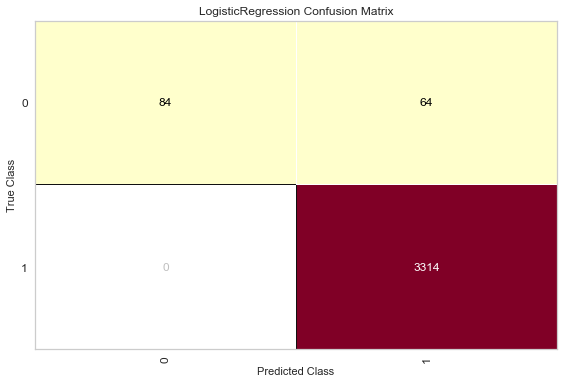

In [44]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logit, classes=[0,1])
cm.score(X_train, y_train)
cm.show()

In [45]:
X_test=test_set.drop('Loan_Status',axis=1)
y_test=test_set['Loan_Status']

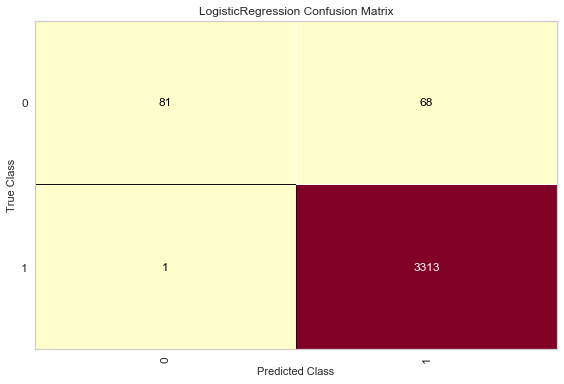

In [46]:
cm = ConfusionMatrix(logit, classes=[0,1])
cm.score(X_test, y_test)
cm.show()

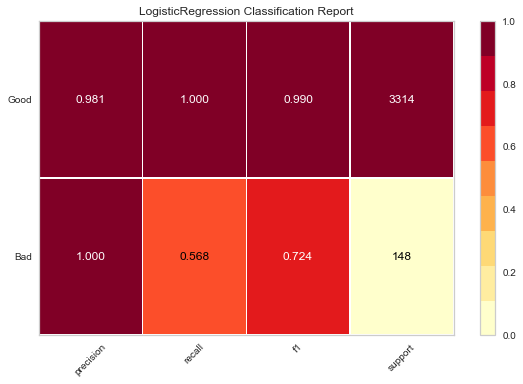

In [47]:
from yellowbrick.classifier import ClassificationReport
classes = ["Bad", "Good"]
visualizer = ClassificationReport(logit, classes=classes, support=True)
visualizer.score(X_train, y_train)
visualizer.show()

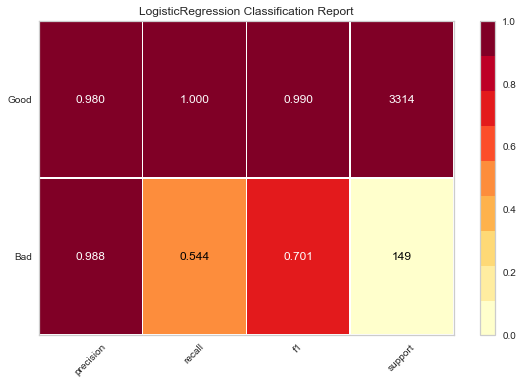

In [48]:
from yellowbrick.classifier import ClassificationReport
classes = ["Bad", "Good"]
visualizer = ClassificationReport(logit, classes=classes, support=True)
visualizer.score(X_test, y_test)
visualizer.show()

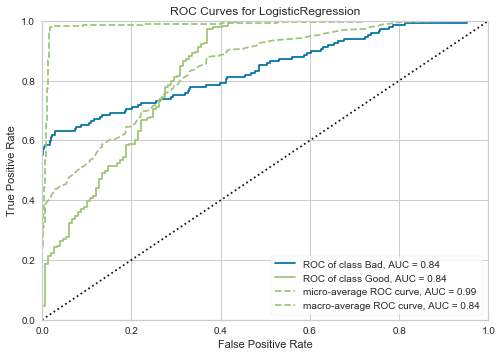

In [49]:
from yellowbrick.classifier import ROCAUC
logit=LogisticRegression(C=0.1,solver='newton-cg',random_state=42,multi_class='auto')
visualizer = ROCAUC(logit,classes=['Bad','Good'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest=RandomForestClassifier(random_state=42)

In [52]:
param_grid_forest={'criterion':['gini','entropy'],
           'max_depth':[i for i in range(1,21)]}

In [53]:
grid_search_forest=GridSearchCV(estimator=forest,param_grid=param_grid_forest,scoring='roc_auc',n_jobs=-1,cv=5,return_train_score=True)

In [54]:
grid_search_forest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='roc_auc')

In [55]:
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 17}

In [56]:
forest=RandomForestClassifier(max_depth=17,random_state=42,criterion='entropy')

In [57]:
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, random_state=42)

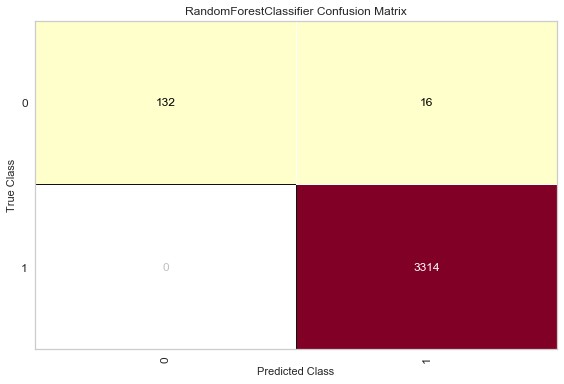

In [58]:
cm = ConfusionMatrix(forest, classes=[0,1])
cm.score(X_train, y_train)
cm.show()

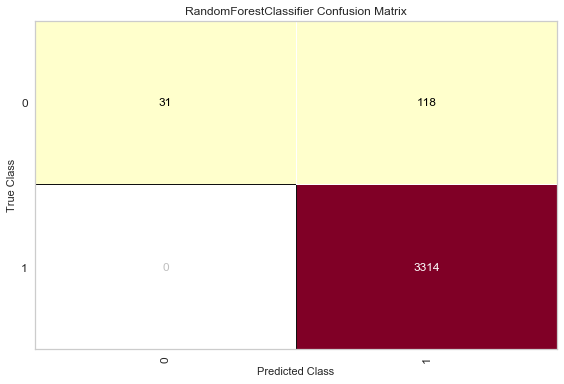

In [59]:
cm = ConfusionMatrix(forest, classes=[0,1])
cm.score(X_test, y_test)
cm.show()

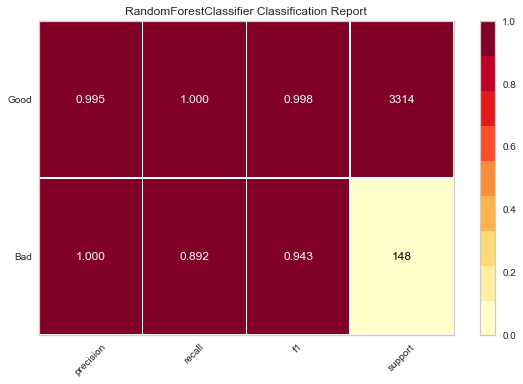

In [60]:
classes = ["Bad", "Good"]
visualizer = ClassificationReport(forest, classes=classes, support=True)
visualizer.score(X_train, y_train)
visualizer.show()

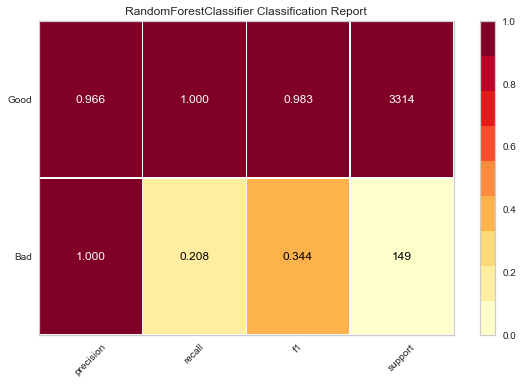

In [61]:
visualizer = ClassificationReport(forest, classes=classes, support=True)
visualizer.score(X_test, y_test)
visualizer.show()

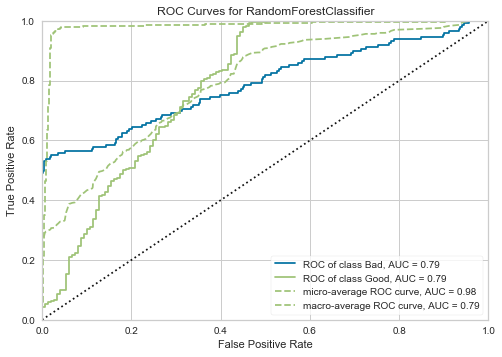

In [62]:
forest=RandomForestClassifier(max_depth=17,random_state=42)
visualizer = ROCAUC(forest,classes=['Bad','Good'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()